## Use ChatGPT for a full ML Regression Project (XGBoost)

### Project Scenario

In this Project, you will be a data scientist on the data & analytics team at a large movie production company located in Los Angles. The company's senior management needs a trained machine learning model that can make predictions on movie revenues (box office). They asked the data & analytics team to provide such a model. Your boss provides you with a prepared data set and asks you to build, tune, evaluate, and test various XGBoost regression models. At the end of the project, you will deliver the best model and parameters to the Senior Management.

### Project Assignment from your Boss

The movie business has always been a very risky and unpredictable one. Our senior management is seeking to improve the quality of movie revenue forecasts by adding machine learning to its toolset. Improving the precision of predictions could give us a competitive advantage over other production companies. Senior management has asked our data & analytics team to tune, test and compare various regression models. We will then identify and deliver the best model with the highest prediction quality.

Your colleagues have already prepared a dataset (movies.csv) with 1) the box office revenue (target) for over 3,500 movies since 1998 and 2) various factors influencing revenues such as the movie budget (features). Your task as our data scientist is to __tune, test and evaluate an XGBoost Regression model__ (with gbtree booster). I recommend working with Python (pandas, numpy, seaborn, xgboost, and scikit-learn) for this project. You should use tools like __pipelines__, __column transformers__, __imputers__, __feature scaling/standardization__, and __random search cross-validation__ for model training, tuning, evaluation, and selection. Before you start with the model, please perform a brief __Explanatory Data Analysis (EDA)__. To evaluate the quality of predictions, use the scores __Root Mean Squared Error__ (RMSE) and the __Coefficient of Determination__ (R-squared). Finally, your task is to __identify and share the best model__ (and its tuned hyperparameters) that minimizes the RMSE score.

### Task 1: Load and Inspect the Dataset 

__Prompt:__ Import elementary Python data science libraries and the movies dataset (movies.csv) and perform a first data inspection and visualization (histogram for all numerical columns). Make sure you understand the dataset (meaning of columns) and identify obvious inconsistencies or data errors (if any) by analyzing the mean, minimum, and maximum values in numerical columns. Check if there are any missing values (NaN) in the dataset.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("movies.csv")
df

,title,main_genre,belongs_to_collection,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,English,title_length,rel_year,rel_month
0,Central Station,Drama,False,2.9,5.596708,3.0,7.6,4.919716,113.0,19,43,0.000000,0.000000,0.000000,False,14,1998,January
1,Hard Rain,Thriller,False,70.0,19.870567,9.0,5.5,6.363405,97.0,10,82,2361.750386,12.890752,14585.748889,True,8,1998,January
2,Half Baked,Comedy,False,8.0,17.460020,1.0,6.4,7.022548,82.0,12,8,119.943461,44.442512,13181.546450,True,9,1998,January
3,Great Expectations,Comedy,False,25.0,55.494066,2.0,6.4,9.941228,111.0,10,6,726.339145,0.000000,10393.573468,True,17,1998,January
4,Buffalo '66,Romance,False,1.5,2.375097,NaN,7.2,9.167761,110.0,26,13,366.582721,0.000000,NaN,True,10,1998,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,Atomic Blonde,Action,False,30.0,90.007945,5.0,6.1,14.455104,115.0,23,96,5208.358646,0.000000,0.208588,True,12,2017,July
3662,The Emoji Movie,Comedy,False,50.0,66.913939,2.0,5.8,33.694599,86.0,33,46,2120.117991,30.000000,31840.881695,True,13,2017,July
3663,The Dark Tower,Action,False,60.0,71.000000,4.0,5.7,50.903593,95.0,50,199,3767.974906,7.594693,4528.739344,True,12,2017,August
3664,Wind River,Action,False,11.0,184.770205,3.0,7.4,40.796775,111.0,22,18,2159.066587,0.000000,171.539887,True,9,2017,August


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3666 non-null   object 
 1   main_genre             3658 non-null   object 
 2   belongs_to_collection  3666 non-null   bool   
 3   budget                 3666 non-null   float64
 4   revenue                3666 non-null   float64
 5   production_companies   3521 non-null   float64
 6   vote_average           3662 non-null   float64
 7   popularity             3666 non-null   float64
 8   runtime                3654 non-null   float64
 9   cast_size              3666 non-null   int64  
 10  crew_size              3666 non-null   int64  
 11  cast_tr                3657 non-null   float64
 12  director_tr            3661 non-null   float64
 13  production_company_tr  3521 non-null   float64
 14  English                3666 non-null   bool   
 15  titl

-> Some columns have missing values (NaN)

### Column Information

__Labels (Target Variable of Prediction)__ 

revenue: the movie´s box office revenue in Million USD (MUSD)

__Feature Variables:__

- title: movie title (for information purposes only, not to be used in regression) 
- main_genre: the main genre of the movie (e.g. Drama)
- belongs_to_collection: Whether the movie belongs to a collection/franchise (True) or not (False). Example: Star Wars
- budget: the movie´s budget in Million USD (MUSD) 
- production_companies: number of involved production companies
- vote_average: Average vote by preview audience. From 1 (very bad) to 10 (excellent)
- popularity: the movie´s popularity measured in google searches, social media posts, etc.
- runtime: runtime of the movie in minutes
- cast_size: number of actors involved
- crew_size: number of crew members involved
- cast_tr: Track Record of the movie´s three main actors (aggregated box-office revenues in MUSD prior to this movie)
- director_tr: Track Record of the movie´s director (aggregated box-office revenues in MUSD prior to this movie)
- production_company_tr: Track Record of the movie´s production company (aggregated box-office revenues in MUSD prior to this movie)
- English: Whether the movie´s original language is English (True) or not (False)
- title_length: number of characters in the movie title
- rel_year: the movie´s year of release
- rel_month: the movie´s month of release

In [33]:
df.describe()

,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,title_length,rel_year
count,3666.000000,3666.000000,3521.000000,3662.000000,3666.000000,3654.000000,3666.000000,3666.000000,3657.000000,3661.000000,3521.000000,3666.000000,3666.000000
mean,37.967148,105.421380,3.513206,6.213053,10.458992,109.718664,24.468631,33.419531,1894.761487,290.398374,5726.472446,13.135843,2008.168031
std,45.120849,185.822130,2.332797,0.865616,16.089384,20.448749,21.002806,36.928229,2341.460368,708.296750,9916.842612,6.884674,5.330202
min,0.000001,0.000001,1.000000,1.000000,0.001880,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
25%,8.000000,8.006743,2.000000,5.700000,5.858285,95.000000,13.000000,10.000000,130.577558,0.000000,0.173066,9.000000,2004.000000
50%,21.000000,38.029167,3.000000,6.200000,8.718403,106.000000,18.000000,19.000000,991.792599,17.496992,357.182732,12.000000,2009.000000
75%,50.000000,116.463053,5.000000,6.800000,12.114949,120.000000,28.000000,44.000000,2819.038392,262.598896,6396.978333,16.000000,2013.000000
max,380.000000,2787.965087,26.000000,9.000000,547.488298,338.000000,224.000000,435.000000,20450.834225,9073.275833,46180.723661,72.000000,2017.000000


-> some outliers but no clear data errors. 

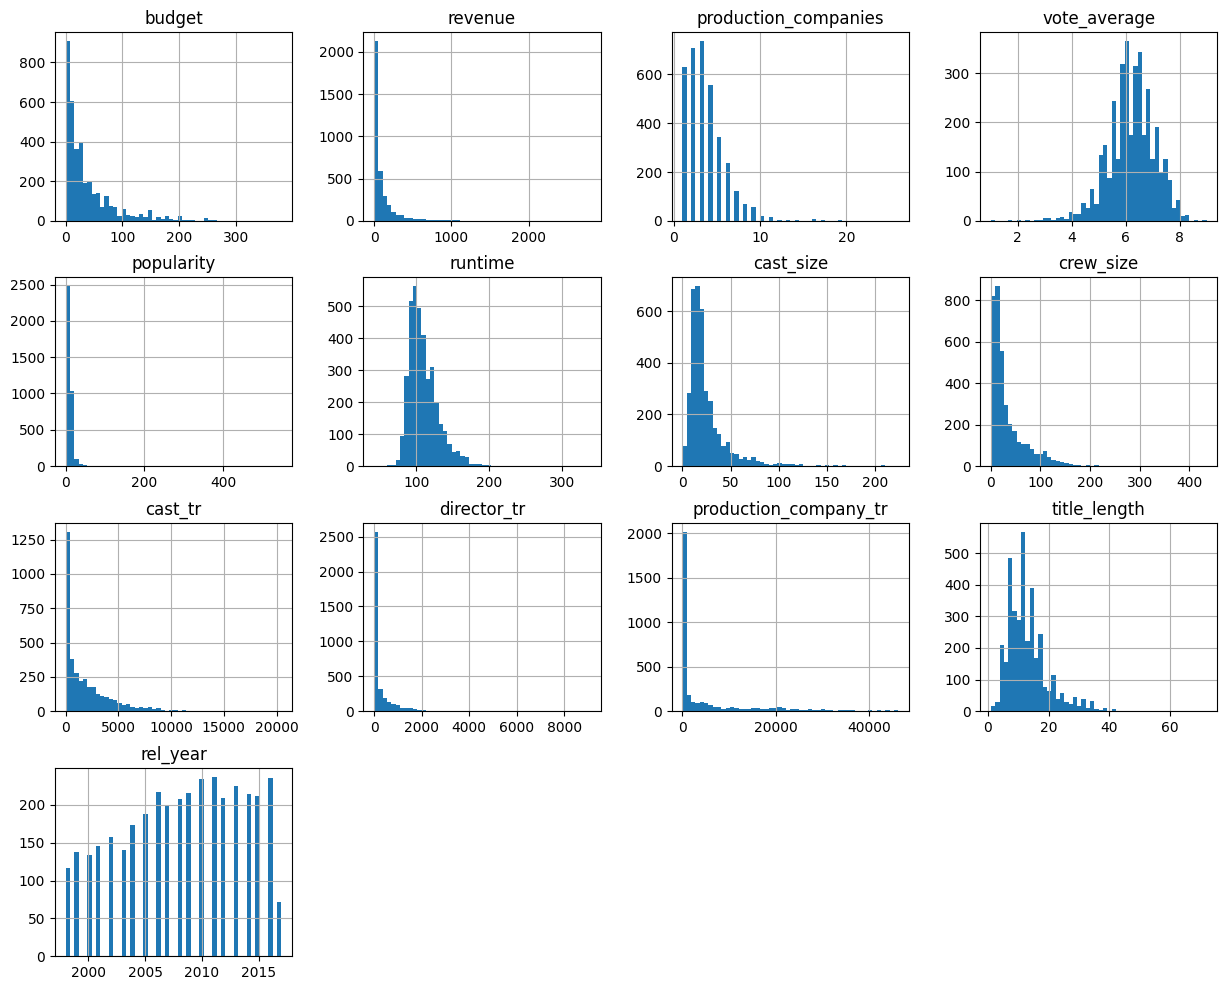

In [59]:
df.hist(figsize=(15, 12), bins=50)
plt.savefig("ml_image.png")
plt.show()

#### Analyse this matplotlib and give me as much explanation and insight as you can. If you don't know something do not give me that info.

I'll analyze these histograms that appear to be showing various metrics related to films or entertainment productions.
General Observations
These 13 histograms represent different features of what seems to be a movie or TV show dataset. The distributions reveal interesting patterns about the entertainment industry.
Financial Metrics

Budget: Highly right-skewed distribution with most productions having relatively small budgets (under 100 million units). Only a few productions have budgets exceeding 200 million.
Revenue: Similarly right-skewed but with a longer tail than budget, showing that while most productions generate modest revenue, some outliers generate extremely high returns (up to 2000+ million units).

Production Characteristics

Runtime: Centered around 100-150 minutes, following a more normal-like distribution. Most films fall within the 90-180 minute range.
Title Length: Most titles are between 5-25 characters, with the peak around 10-15 characters.
Release Year (rel_year): Shows data spanning from approximately 2000 to 2015/2016, with increasing film production over time. The number of films produced yearly grew consistently until around 2015.

Cast and Crew

Cast Size: Most productions have small casts (under 50 people), with a sharp decline for larger casts.
Crew Size: Most productions have crews of 100 or fewer, with a very steep drop-off after that.
Vote Average: A more normal distribution centered around 6-7, suggesting that ratings tend to cluster around above-average scores.

Industry Structure

Production Companies: Most films involve very few production companies (less than 5), suggesting limited collaboration.
Cast_tr, Director_tr, Production_company_tr: These appear to be metrics related to the "reach" or network size of casts, directors, and production companies. All show highly right-skewed distributions, suggesting the industry is dominated by a few major players while most have limited reach.

Popularity

Popularity: Extremely right-skewed, indicating that very few productions achieve high popularity, while the vast majority have low popularity scores.

These distributions highlight the "winner-takes-all" nature of the entertainment industry, where resources, recognition, and financial returns are concentrated among a small percentage of productions, while most operate with modest budgets, revenues, and popularity.

#### How can we maximise revenue based on this data?

Based on the histogram data, here are strategic approaches to maximize revenue in film production:
Key Revenue Drivers

Budget Allocation:

The budget histogram shows most films have modest budgets, but there's likely a correlation between higher budgets and higher revenue potential (though not guaranteed).
Strategy: Invest in a balanced portfolio of productions - a few higher-budget films with blockbuster potential alongside multiple mid-budget productions that provide better risk management.


Runtime Optimization:

The runtime histogram shows a concentration around 100-150 minutes.
Strategy: Target this "sweet spot" as extremely short or overly long films might limit revenue potential - audiences expect certain runtime value and theaters can schedule more showings of optimally-lengthed films.


Cast and Crew Size:

The cast_size and crew_size histograms suggest most productions operate with relatively small teams.
Strategy: Be selective with casting - prioritize a few high-value cast members (with higher cast_tr values) rather than large ensemble casts, as star power likely drives revenue more than cast quantity.


Production Company Partnerships:

The production_company_tr histogram suggests some companies have exponentially greater reach than others.
Strategy: Partner with established production companies that have high reach metrics to improve distribution and marketing capabilities.


Release Timing:

The rel_year histogram shows increasing production volume over time.
Strategy: Analyze which years had higher average revenues (not directly shown in histograms) and identify seasonal patterns for release timing to maximize audience availability.


Rating Targets:

The vote_average histogram centers around 6-7, suggesting audiences favor above-average quality.
Strategy: Focus on production values that consistently deliver ratings in the upper range (7-8) as these likely correlate with stronger word-of-mouth and sustained revenue.


Popularity Leverage:

The extremely skewed popularity histogram indicates few productions achieve high popularity.
Strategy: Invest more heavily in marketing and social media presence to shift more productions toward the higher end of the popularity spectrum.



To truly maximize revenue, I'd recommend developing a predictive model that uses these variables to estimate revenue potential, with particular focus on the relationships between budget, cast/director reach, production company partnerships, and popularity metrics.

#### Explain how this works and what the code does?

How the Film Revenue Predictor Works
The code I provided is a comprehensive machine learning pipeline designed to predict film revenue and extract actionable insights. Let me walk you through how it works:

##### Core Structure and Workflow
The code is organized as a Python class called FilmRevenuePredictor that handles the complete machine learning workflow from data preparation to generating business insights. Here's how it flows:

##### Data Loading and Preparation

Loads a CSV dataset containing film attributes like budget, runtime, popularity, etc.

Handles missing values and performs initial data cleaning

Extracts the target variable (revenue) and applies log transformation to handle its right-skewed distribution (common in financial data)

Splits data into training and test sets for model validation

##### Feature Engineering

Creates powerful derived features that capture industry-specific relationships:

budget_per_minute: Measures production value density

cast_crew_ratio: Captures production efficiency

star_power: Calculates star power per cast member (cast_tr/cast_size)

recency: Accounts for release timing effects

Applies power transformations to handle highly skewed features like budget and popularity

##### Model Training with Hyperparameter Tuning

Implements three gradient boosting algorithms (XGBoost, LightGBM, Gradient Boosting)

Uses GridSearchCV to systematically search for optimal hyperparameters like:

Number of trees (n_estimators)

Learning rate

Tree depth

Subsampling rates

The grid search performs cross-validation to ensure model robustness

Model Evaluation

Calculates standard regression metrics (RMSE, MAE, R²) on both log-transformed and original scales

Performs cross-validation to ensure the model generalizes well to new data

**Feature Importance Analysis**

Extracts and ranks features by their contribution to prediction accuracy

Creates visualizations of feature importance

Implements SHAP (SHapley Additive exPlanations) analysis for deeper insights into how each feature 
affects predictions

Revenue Optimization Insights

Translates technical model findings into business recommendations

Provides specific guidance based on the top revenue-driving features

Suggests next steps for implementing the insights in a production context

**Why This Approach Is Effective**

Gradient boosting models excel at capturing complex, non-linear relationships in data and are especially effective for tabular data with mixed feature types.

Systematic feature engineering creates powerful predictors by combining raw features in ways that capture industry-specific relationships.

Log transformation of revenue addresses the highly skewed distribution seen in the histograms, improving model performance.

Hyperparameter tuning optimizes the model's learning process for this specific dataset.

SHAP analysis provides deeper insights than standard feature importance, showing not just which features matter but how they affect predictions at different values.

Would you like me to elaborate on any specific part of this workflow?



#### Suggest best ML approach and write me the code for it as ml_suggestion.py

I'll suggest a comprehensive machine learning approach for revenue prediction in the film industry and provide the code implementation.

#### What would be the most common title length approx?

Based on the title_length histogram in the image, I cannot definitively see any titles with lengths above 70 characters.

The x-axis of the title_length histogram appears to end at around 60-65 characters, and the frequency of titles becomes extremely low (approaching zero) beyond the 50-character mark. The scale doesn't extend to 70, and there are no visible bars that would indicate titles of that length.

Given the resolution of the histogram, it's difficult to determine exactly how many titles might be above a specific threshold like 50 or 60 characters, but they appear to be very rare exceptions in the dataset. The vast majority of titles cluster in the 5-25 character range, with decreasing frequency as title length increases.RetryClaude can make mistakes. 




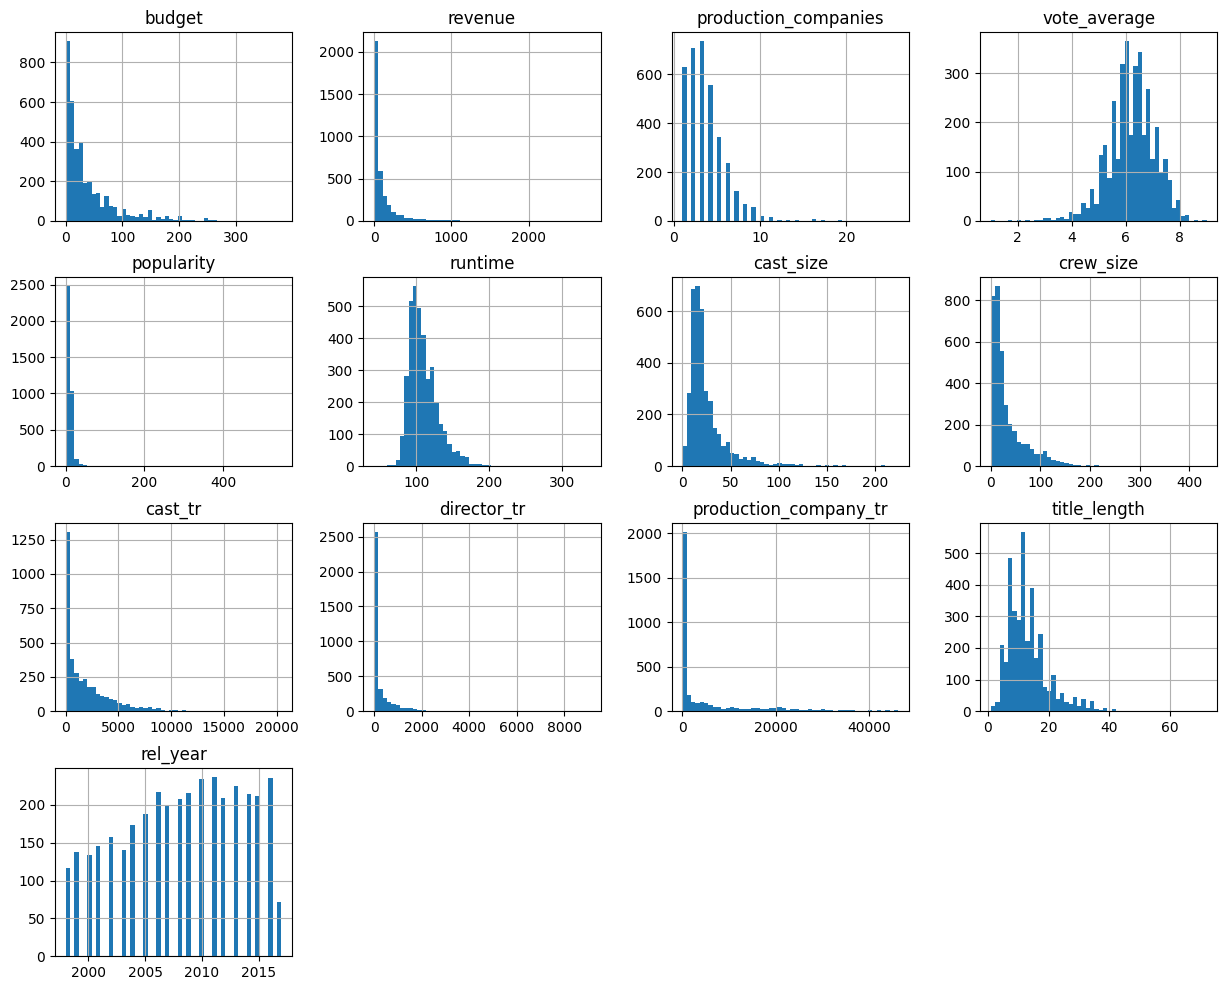

### Task 2: Split the Dataset into a Training Set and a Test Set

__Prompt__: Split the movies dataset into a Training Set (75%) and a Test Set (25%). Save and inspect train_set and test_set. Before doing this remove the title column, as it is not a regression feature.

(Hint: use Random Shuffling with random state = 42)

In [35]:
df.drop(columns="title", inplace=True)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_set, test_set = train_test_split(
    df, test_size=0.25, shuffle=True, random_state=42
)

In [38]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 3325 to 3174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   main_genre             2744 non-null   object 
 1   belongs_to_collection  2749 non-null   bool   
 2   budget                 2749 non-null   float64
 3   revenue                2749 non-null   float64
 4   production_companies   2633 non-null   float64
 5   vote_average           2745 non-null   float64
 6   popularity             2749 non-null   float64
 7   runtime                2739 non-null   float64
 8   cast_size              2749 non-null   int64  
 9   crew_size              2749 non-null   int64  
 10  cast_tr                2741 non-null   float64
 11  director_tr            2745 non-null   float64
 12  production_company_tr  2633 non-null   float64
 13  English                2749 non-null   bool   
 14  title_length           2749 non-null   int64  
 15  rel_ye

In [39]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 1960 to 2822
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   main_genre             914 non-null    object 
 1   belongs_to_collection  917 non-null    bool   
 2   budget                 917 non-null    float64
 3   revenue                917 non-null    float64
 4   production_companies   888 non-null    float64
 5   vote_average           917 non-null    float64
 6   popularity             917 non-null    float64
 7   runtime                915 non-null    float64
 8   cast_size              917 non-null    int64  
 9   crew_size              917 non-null    int64  
 10  cast_tr                916 non-null    float64
 11  director_tr            916 non-null    float64
 12  production_company_tr  888 non-null    float64
 13  English                917 non-null    bool   
 14  title_length           917 non-null    int64  
 15  rel_yea

### Task 3: Perform an Explanatory Data Analysis (EDA) - Correlations and Regressionplots

__Prompt__: Perform an Explanatory Data Analysis (EDA) and statistical data visualization on the Training Set. Please calculate and visualize (heatmap) pairwise correlations and identify the feature that shows the strongest correlation with revenue. Create pair-wise linear regression plots between revenue and the features that are strongest correlated with revenue (such as budget, belongs_to_collection, popularity, and crew_size).   

In [40]:
corr_matrix = train_set.corr(numeric_only=True)

In [41]:
import seaborn as sns

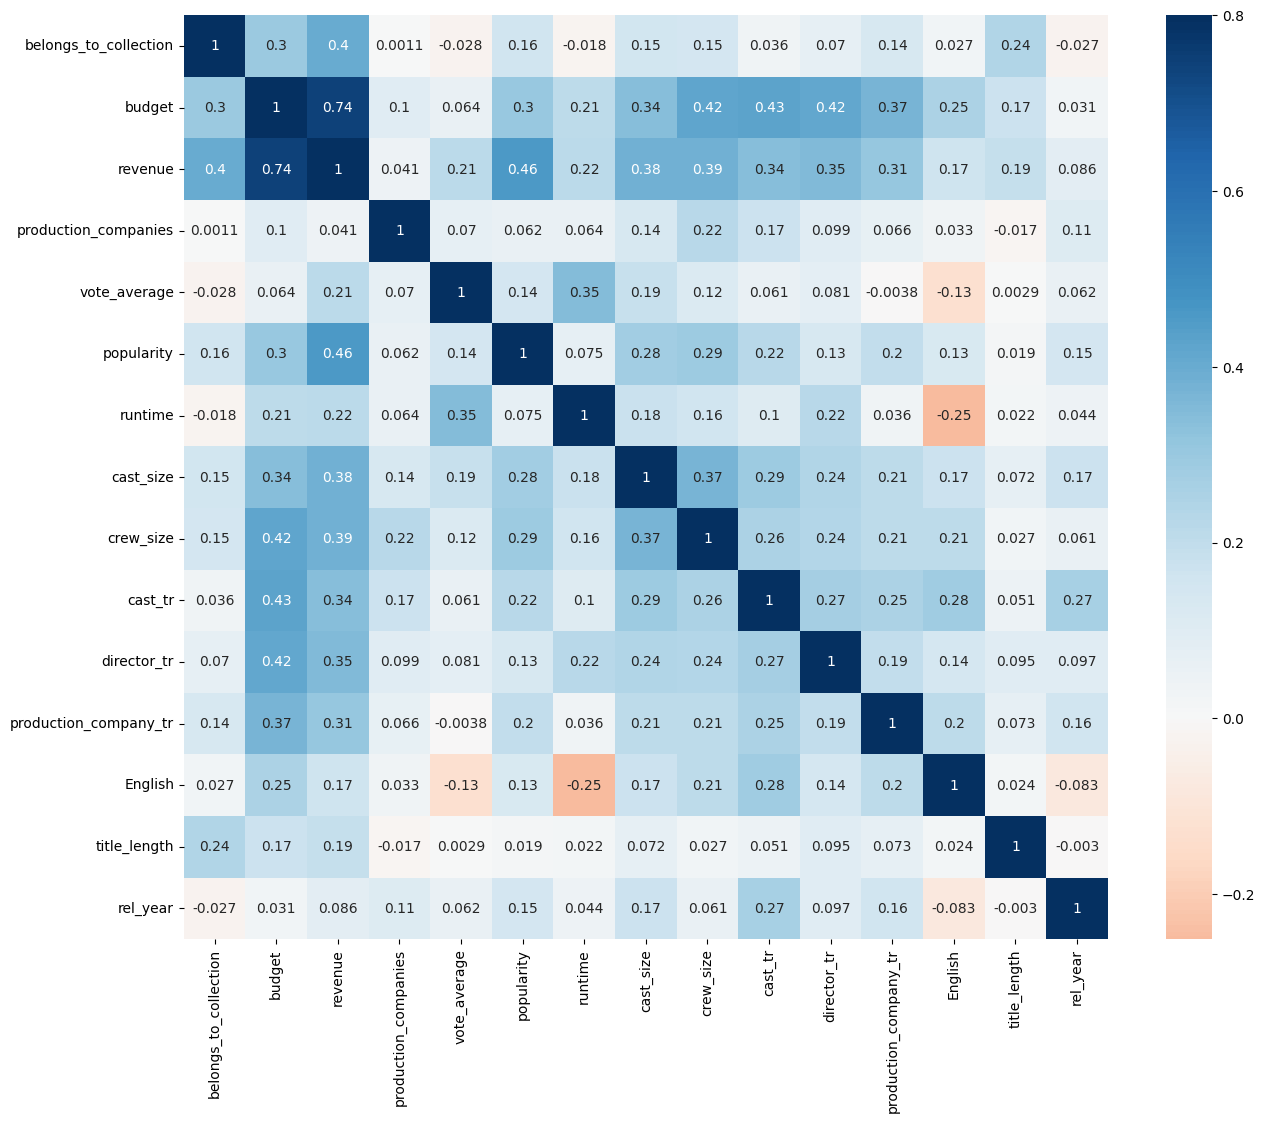

In [42]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, square=True, annot=True, cmap="RdBu", center=0, vmax=0.8)
plt.show()

-> budget shows the strongest correlation with revenue.

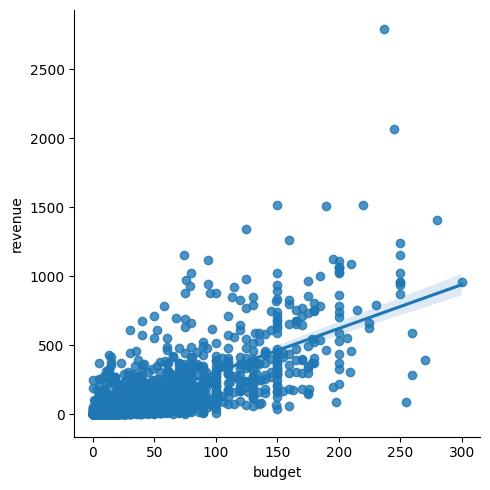

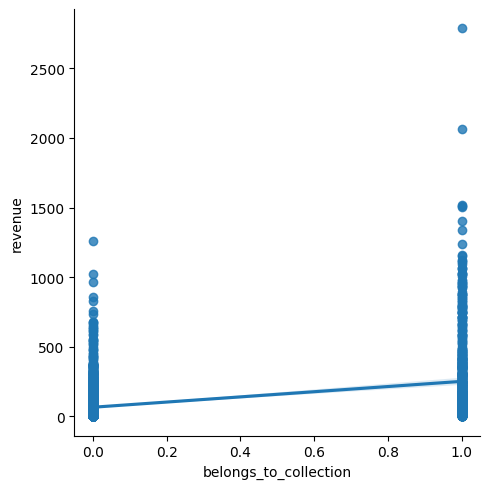

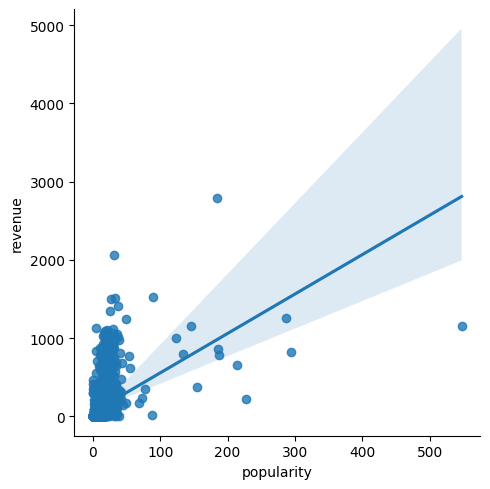

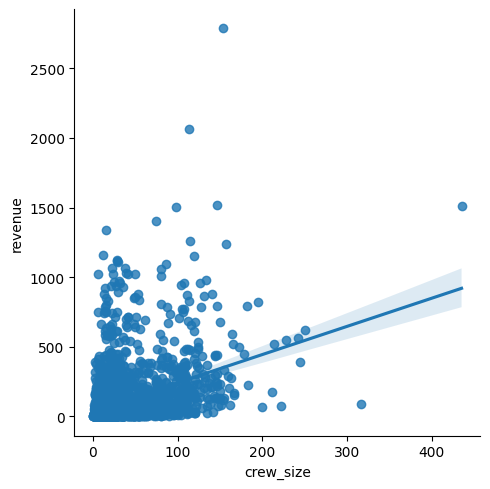

In [43]:
features = ["budget", "belongs_to_collection", "popularity", "crew_size"]
for i in features:
    sns.lmplot(x=i, y="revenue", data=train_set)
    plt.show()

### Task 4:  Perform an Explanatory Data Analysis (EDA) - Categorical Data 

__Prompt:__ Identify the categorical/text features among the features (please treat rel_year as a categorical feature for this task). Next, create one categorical barplot per categorical feature and compare mean revenues across categories.   

In [44]:
categoricals = train_set.select_dtypes(exclude=np.number).columns.tolist()
categoricals

['main_genre', 'belongs_to_collection', 'English', 'rel_month']

In [45]:
categoricals.append("rel_year")

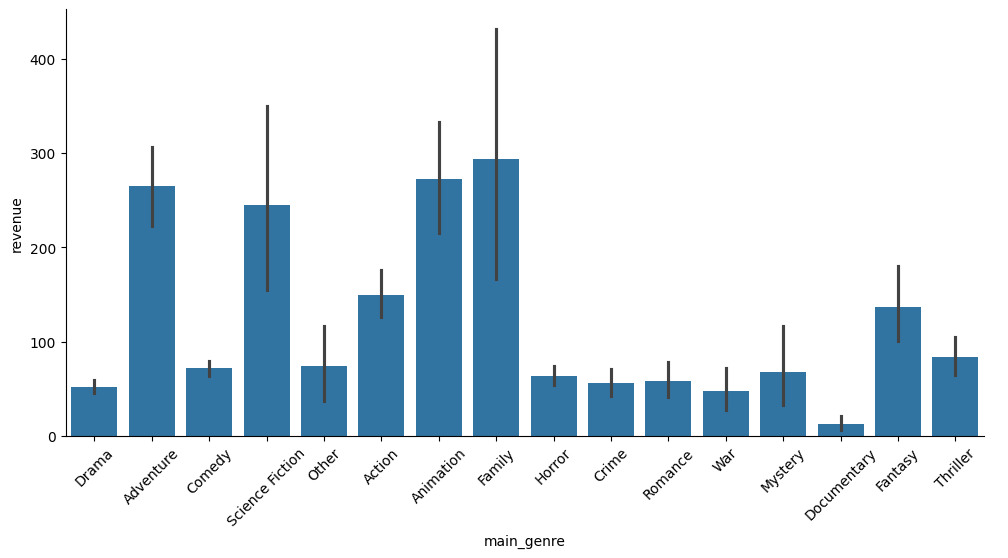

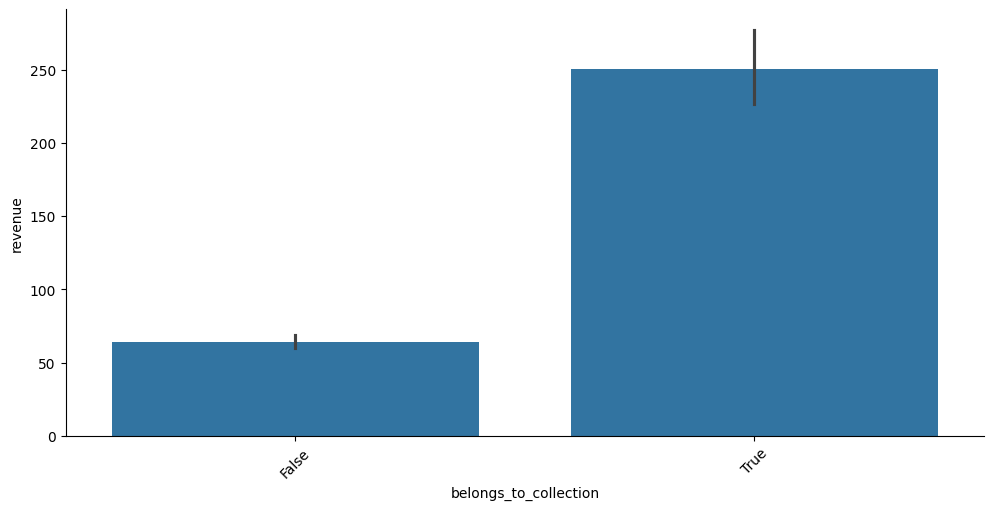

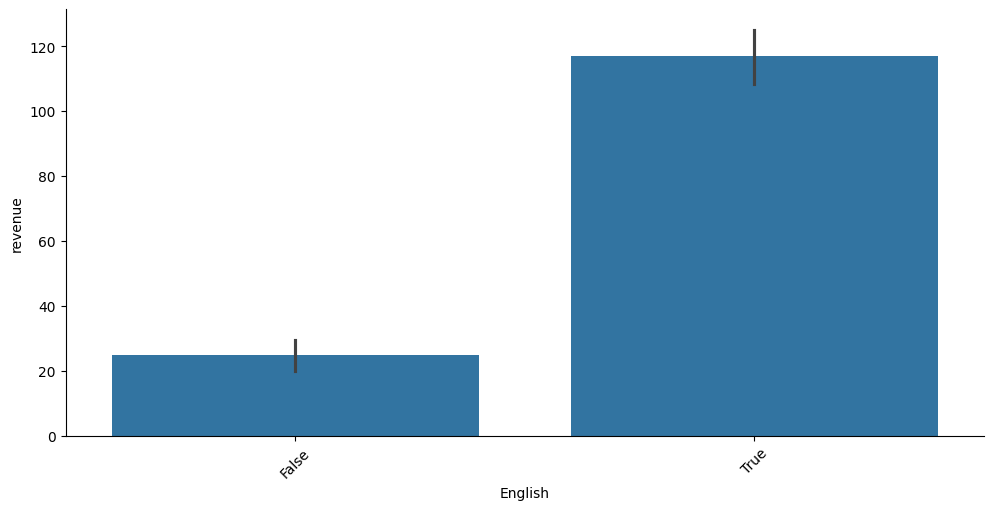

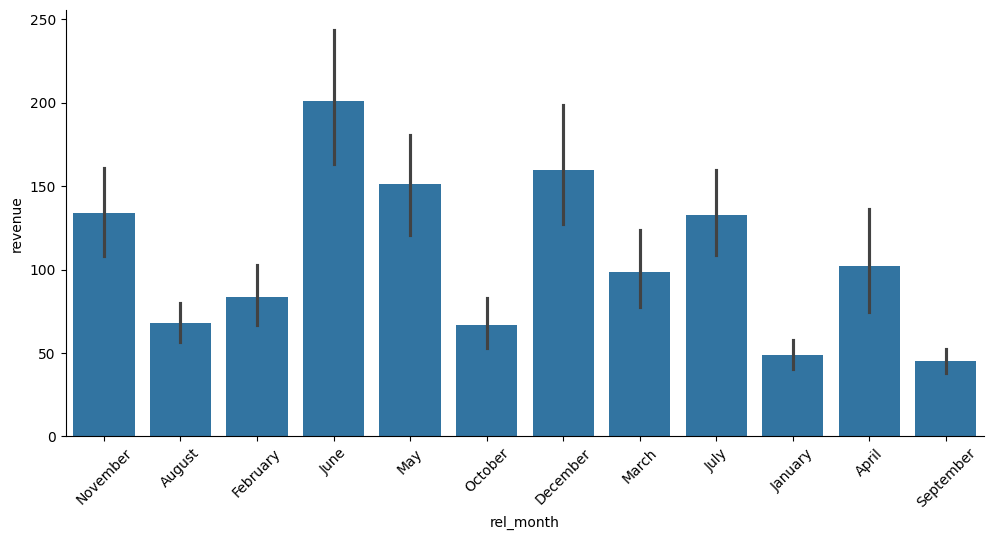

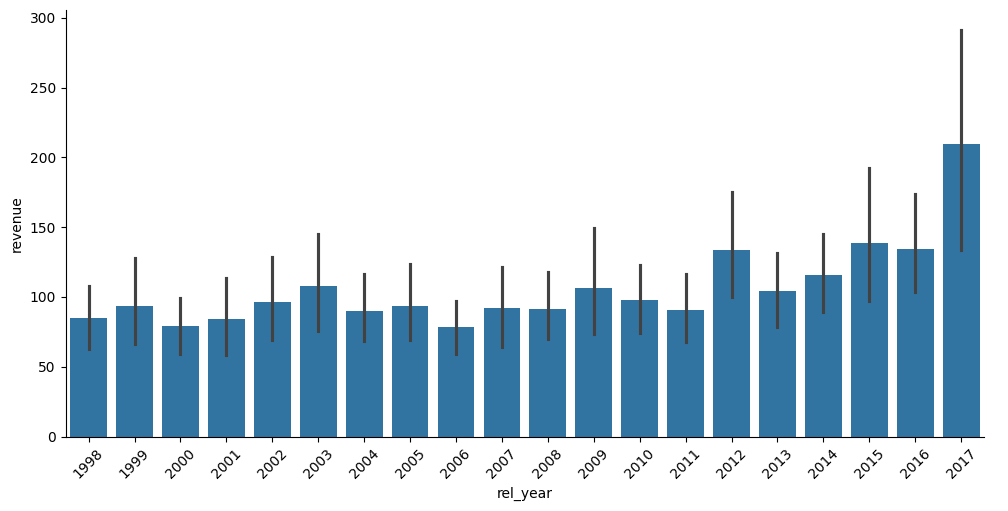

In [46]:
for cat in categoricals:
    sns.catplot(x=cat, y="revenue", data=train_set, kind="bar", aspect=2)
    plt.xticks(rotation=45)
    plt.show()

### Task 5: Prepare the Data for Data Preprocessing

__Prompt:__ Extract X_train, y_train, X_test, and y_test from train_set and test_set by separating the target variable revenue from the feature variables. Identify and save the names of numerical features and text/categorical features (excluding boolean features).

In [47]:
target = "revenue"

In [48]:
features = train_set.drop(columns=[target]).columns.to_list()
features

['main_genre',
 'belongs_to_collection',
 'budget',
 'production_companies',
 'vote_average',
 'popularity',
 'runtime',
 'cast_size',
 'crew_size',
 'cast_tr',
 'director_tr',
 'production_company_tr',
 'English',
 'title_length',
 'rel_year',
 'rel_month']

In [49]:
X_train = train_set[features].copy()
y_train = train_set[target].copy()
X_test = test_set[features].copy()
y_test = test_set[target].copy()

In [50]:
numeric_feat = list(X_train.select_dtypes(include=np.number).columns)
numeric_feat

['budget',
 'production_companies',
 'vote_average',
 'popularity',
 'runtime',
 'cast_size',
 'crew_size',
 'cast_tr',
 'director_tr',
 'production_company_tr',
 'title_length',
 'rel_year']

In [51]:
text_feat = list(X_train.select_dtypes(include="object").columns)
text_feat

['main_genre', 'rel_month']

### Task 6: Create a Data Preprocessing Pipeline

__Prompt:__ Create a Data Preprocessing Pipeline (ColumnTransformer) that transforms numerical and categorical features separately and that passes through boolean features:

- numerical Features: Use a scaler that is robust to outliers. Fill missing values (NaN) with the median value.

- categorical features: Use One-Hot-Encoding. Fill missing values (NaN) with the most frequent value.

- boolean features: shall be passed through

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [53]:
num_pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())]
)

In [54]:
cat_pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder())]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[

        ("num", num_pipeline, numeric_feat),

        ("cat", cat_pipeline, text_feat),

    ],
    remainder="passthrough",

)

In [56]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['budget', 'production_companies',
                                  'vote_average', 'popularity', 'runtime',
                                  'cast_size', 'crew_size', 'cast_tr',
                                  'director_tr', 'production_company_tr',
                                  'title_length', 'rel_year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['main_genre', 'rel_month'])])

### Task 7: Initialize an XGBoost Regression Model and create the Regression Pipeline

__Prompt__: Initialize an XGBRegressor model (random_state = 42, tree_method = "hist"). Create a regression pipeline with 1) the preprocessing pipeline and 2) the regression model. Inspect the regression pipeline and its parameters. 

In [ ]:
from xgboost import XGBRegressor


model = XGBRegressor(random_state=42, tree_method="hist")

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
regressor = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

In [ ]:
regressor

In [ ]:
regressor.get_params()

### Task 8: Perform Hyperparameter Tuning using Cross Validation

__Prompt:__ Perform Hyperparameter Tuning using Randomized Search Cross Validation (60 random parameter settings with random_State = 42) on the Training Set. To evaluate model performance, calculate the regression scores RMSE (root mean squared error) and R-squared (coefficient of determination). Finally, refit the best model with the lowest RMSE score. 


Hint: Tuning shall include the following XGBRegressor Hyperparameters: max_depth, n_estimators, learning_rate, colsample_bytree, subsample, min_child_weight, gamma, reg_alpha, and reg_lambda.

In [ ]:
param_grid = [
    {
        "model__max_depth": [3, 4, 5, 6, 7, 8, 9, 10],

        "model__n_estimators": [100, 150, 200],

        "model__learning_rate": [0.01, 0.03, 0.05, 0.07, 0.09, 0.11],

        "model__colsample_bytree": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],

        "model__subsample": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],

        "model__min_child_weight": [1, 3, 5, 7, 9, 11, 13],

        "model__gamma": [0, 1, 2, 3, 4, 5],

        "model__reg_alpha": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],

        "model__reg_lambda": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],

    }
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_iter = 60
n_jobs = -1
scores = ["neg_root_mean_squared_error", "r2"]
refit = "neg_root_mean_squared_error"
random_state = 42

In [ ]:
rscv = RandomizedSearchCV(
    estimator=regressor,

    param_distributions=param_grid,
    n_iter=n_iter,

    n_jobs=n_jobs,

    scoring=scores,

    refit=refit,

    random_state=random_state,
)

In [ ]:
rscv.fit(X=X_train, y=y_train)

### Task 9: Evaluate Cross Validation and select the best Model

__Prompt:__ Evaluate the results of the Randomized Search Cross Validation (60 sets) using RMSE and R-squared. Identify the best model and print the best set of Hyperparameters and the corresponding best RMSE score. Check if the scores RMSE and R-squared lead to the same conclusion (same best model). 

In [ ]:
rscv.best_params_

In [ ]:
rscv.best_score_

In [ ]:
cv_results = pd.DataFrame(rscv.cv_results_)[
    [
        "params",

        "mean_test_neg_root_mean_squared_error",

        "mean_test_r2",

        "rank_test_neg_root_mean_squared_error",

        "rank_test_r2",
    ]
]

In [ ]:
cv_results = cv_results.sort_values(
    "mean_test_neg_root_mean_squared_error", ascending=False
)

cv_results

In [ ]:
rscv.best_estimator_[1]

## Task 10: Evaluate model performance on the Testset

__Prompt:__ Evaluate the best model's performance and prediction quality on the Test Set using the scores RMSE and R-squared. Compare with Cross Validation results.

In [ ]:
pred = rscv.predict(X_test)
pred

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_true=y_test, y_pred=pred, squared=False)

In [ ]:
metrics.r2_score(y_true=y_test, y_pred=pred)

-> In line with Cross Validation results (RMSE score better, R-squared score slightly worse)